<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/Stock_Predict_trading_TATA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 5.3MB/s 
     |████████████████████████████████| 153kB 17.0MB/s 
     |████████████████████████████████| 266kB 18.6MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=8cbaa1591b45e5551ab544c908b809d9bf1f974e4e448045156748a6a257f0c9
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=860de2c842865cb31e2907d1fe55f371cdf8589bf48375ceedc1c1773f0dab75
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
api_key = '5LLGMLRK81AS4OEH'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
# ts = TimeSeries(key=api_key,output_format='pandas')
# df, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
# print(df)

In [ ]:
# cc = ForeignExchange(key = api_key, output_format = 'pandas')
# df, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# print(df)

In [ ]:
# df = df[::-1]
# df.tail(10)

In [ ]:
# Get the stock quote
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2010-01-25', end = date.today())

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-25,154.938004,150.386993,153.988007,152.098999,8448704.0,121.989670
2010-01-27,150.862000,140.731003,148.804001,142.065994,16092885.0,113.942802
2010-01-28,145.371002,138.960007,143.460999,140.710999,27120073.0,112.856033
2010-01-29,140.848999,132.875000,139.503998,137.395996,20899408.0,110.197281
2010-02-01,143.134995,134.229996,136.080002,142.442001,24102055.0,114.244377
...,...,...,...,...,...,...
2020-08-24,123.000000,120.800003,122.000000,121.199997,31294253.0,121.199997
2020-08-25,128.350006,121.099998,121.800003,127.099998,90263366.0,127.099998
2020-08-26,139.000000,128.350006,130.500000,137.899994,197510376.0,137.899994


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2010-01-25,154.938004,150.386993,153.988007,152.098999,8448704.0,121.989670,2010-01-25
2010-01-27,150.862000,140.731003,148.804001,142.065994,16092885.0,113.942802,2010-01-27
2010-01-28,145.371002,138.960007,143.460999,140.710999,27120073.0,112.856033,2010-01-28
2010-01-29,140.848999,132.875000,139.503998,137.395996,20899408.0,110.197281,2010-01-29
2010-02-01,143.134995,134.229996,136.080002,142.442001,24102055.0,114.244377,2010-02-01
...,...,...,...,...,...,...,...
2020-08-24,123.000000,120.800003,122.000000,121.199997,31294253.0,121.199997,2020-08-24
2020-08-25,128.350006,121.099998,121.800003,127.099998,90263366.0,127.099998,2020-08-25
2020-08-26,139.000000,128.350006,130.500000,137.899994,197510376.0,137.899994,2020-08-26


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(2611, 7)

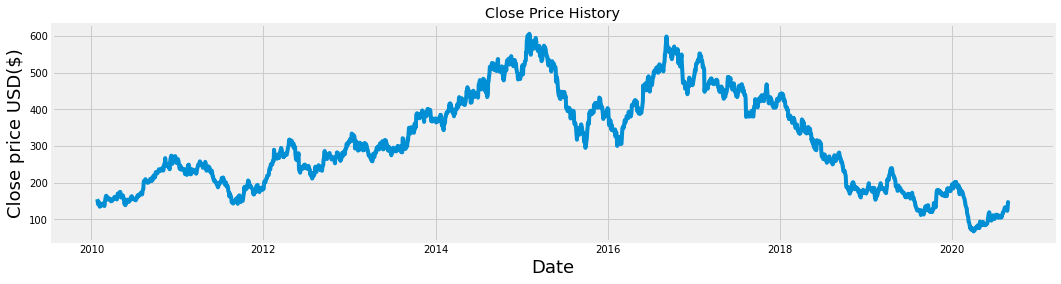

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['High'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['High'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.99)

training_data_len

2585

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16333551],
       [0.15577336],
       [0.145586  ],
       ...,
       [0.13376598],
       [0.14832997],
       [0.14332068]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.16333551, 0.15577336, 0.145586  , 0.1371964 , 0.14143757,
       0.14754889, 0.14277709, 0.1420424 , 0.12497193, 0.12842276,
       0.12845987, 0.13066208, 0.12989029, 0.13374557, 0.13616857,
       0.14094221, 0.14017042, 0.13631513, 0.13826134, 0.13723352,
       0.1322595 , 0.12845987, 0.14044502, 0.17236702, 0.17469725,
       0.18048018, 0.1761852 , 0.17585497, 0.16407019, 0.1669329 ,
       0.16326315, 0.16188652, 0.16065648, 0.16530024, 0.16801638,
       0.16553772, 0.16460266, 0.16342828, 0.15799415, 0.15232253,
       0.1537177 , 0.15470842, 0.15474553, 0.15727801, 0.16223345,
       0.16517222, 0.16440042, 0.168842  , 0.16847462, 0.17484568,
       0.17322972, 0.16469357, 0.16862305, 0.16570285, 0.16205165,
       0.16915368, 0.17398298, 0.18965829, 0.18738184, 0.19189759])]
[0.18969537101429104]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2525, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mse')


In [ ]:
model.fit(x_train,y_train,batch_size=1, epochs = 3,)

Epoch 1/3
2525/2525 [==============================] - 120s 48ms/step - loss: 0.0035
Epoch 2/3
2525/2525 [==============================] - 118s 47ms/step - loss: 0.0011
Epoch 3/3
2525/2525 [==============================] - 122s 48ms/step - loss: 7.2125e-04


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test = range(10)

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

2.9761420029860277

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


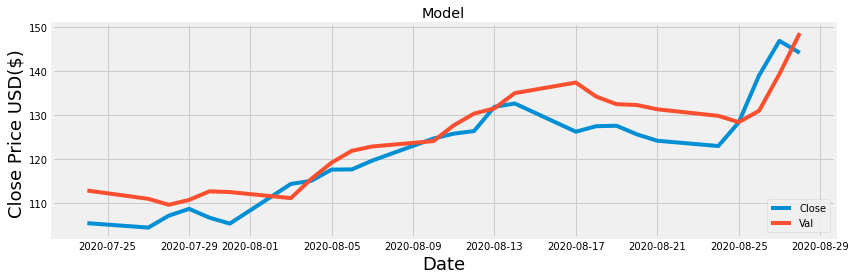

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['High'])
plt.plot(valid[['High', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
valid.sum(axis=0)

High           3176.649986
Predictions    3254.029678
dtype: float64

In [ ]:
valid.tail(30)

,High,Predictions
Date,,
2020-07-24,105.500000,112.901726
2020-07-27,104.500000,111.017899
2020-07-28,107.199997,109.673477
2020-07-29,108.750000,110.769241
2020-07-30,106.750000,112.723167
2020-07-31,105.400002,112.555016
2020-08-03,114.400002,111.180809
2020-08-04,115.099998,115.527191
2020-08-05,117.650002,119.230827


In [ ]:
# # Get the quote
# # apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
# apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# apple_quote = apple_quote[::-1]
# # Create new dataframe
# new_df = apple_quote.filter(items=['High'])
# # Get the last 60 days closing price and convert to numpy array
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)

# # Convert the X_test dataset to numpy array
# X_test = np.array(X_test)
# # Reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# # Get Predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# comp = (new_df['High'][-1])
# # comp = float("{:.5f}".format(comp))
# # pred_price = float(pred_price)
# # pred_price = float("{:.4f}".format(pred_price))
# print(pred_price)
# print(comp)
# if pred_price > comp:
#   print("green")
# elif pred_price < comp:
#   print("red")
# else:
#   print ("Dont buy or sell")

In [ ]:
# new, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# new = new[::-1]
# print(new.tail(10))

In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,60)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,60,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)